In [39]:
pip install scikit-learn


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install plotnine

In [41]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from palmerpenguins import load_penguins
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from plotnine import * 
from sklearn.metrics import mean_squared_error



**PART ONE**

In [58]:
#look at data
df = pd.read_csv("insurance_costs_1.csv")
df.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


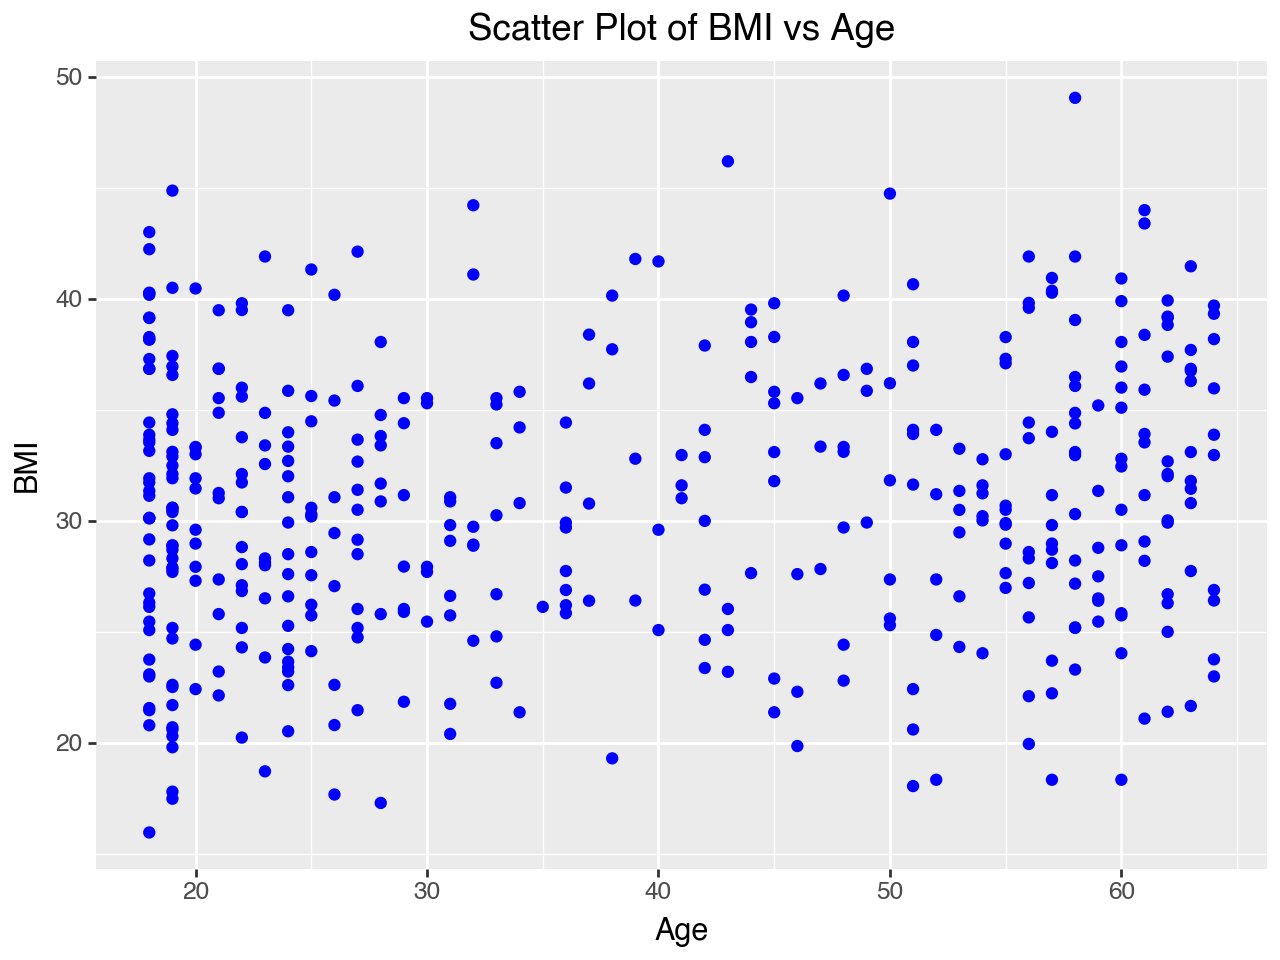

In [43]:
#summarize data in plot
(ggplot(df,aes(x="age", y="bmi"))
+geom_point(color='blue') +
    labs(title='Scatter Plot of BMI vs Age', x='Age', y='BMI')
)


In [44]:
#summarize data 
#find mean

mean_bmi = df["bmi"].mean()
mean_age = df["age"].mean()
mean_charges = df["charges"].mean()

print(mean_bmi)
print(mean_age)
print(mean_charges)

30.768897911832948
37.96055684454756
12297.098118187932
30.768897911832948
37.96055684454756
12297.098118187932


In [45]:
df.describe()

,age,bmi,charges
count,431.000000,431.000000,431.000000
mean,37.960557,30.768898,12297.098118
std,16.363909,6.111362,11876.527128
min,18.000000,15.960000,1131.506600
25%,22.000000,26.357500,2710.444575
50%,34.000000,30.590000,9866.304850
75%,55.000000,35.272500,14510.872600
max,64.000000,49.060000,55135.402090


In [46]:
#summarize data 
print("There are", df[df["sex"]=='female'].shape[0],"females in the data")
print("There are", df[df["sex"]=='male'].shape[0],"females in the data")

There are 225 females in the data
There are 206 females in the data
There are 225 females in the data
There are 206 females in the data


In [47]:
#Make dummy variables for female  and change smoker 
df['female']=(df['sex']=='female').astype(int)
df['smoker']=(df['smoker']=='yes').astype(int)
df.head()

,age,sex,bmi,smoker,region,charges,female
0,19,female,27.900,1,southwest,16884.92400,1
1,33,male,22.705,0,northwest,21984.47061,0
2,32,male,28.880,0,northwest,3866.85520,0
3,31,female,25.740,0,southeast,3756.62160,1
4,60,female,25.840,0,northwest,28923.13692,1


Make 3 plots:

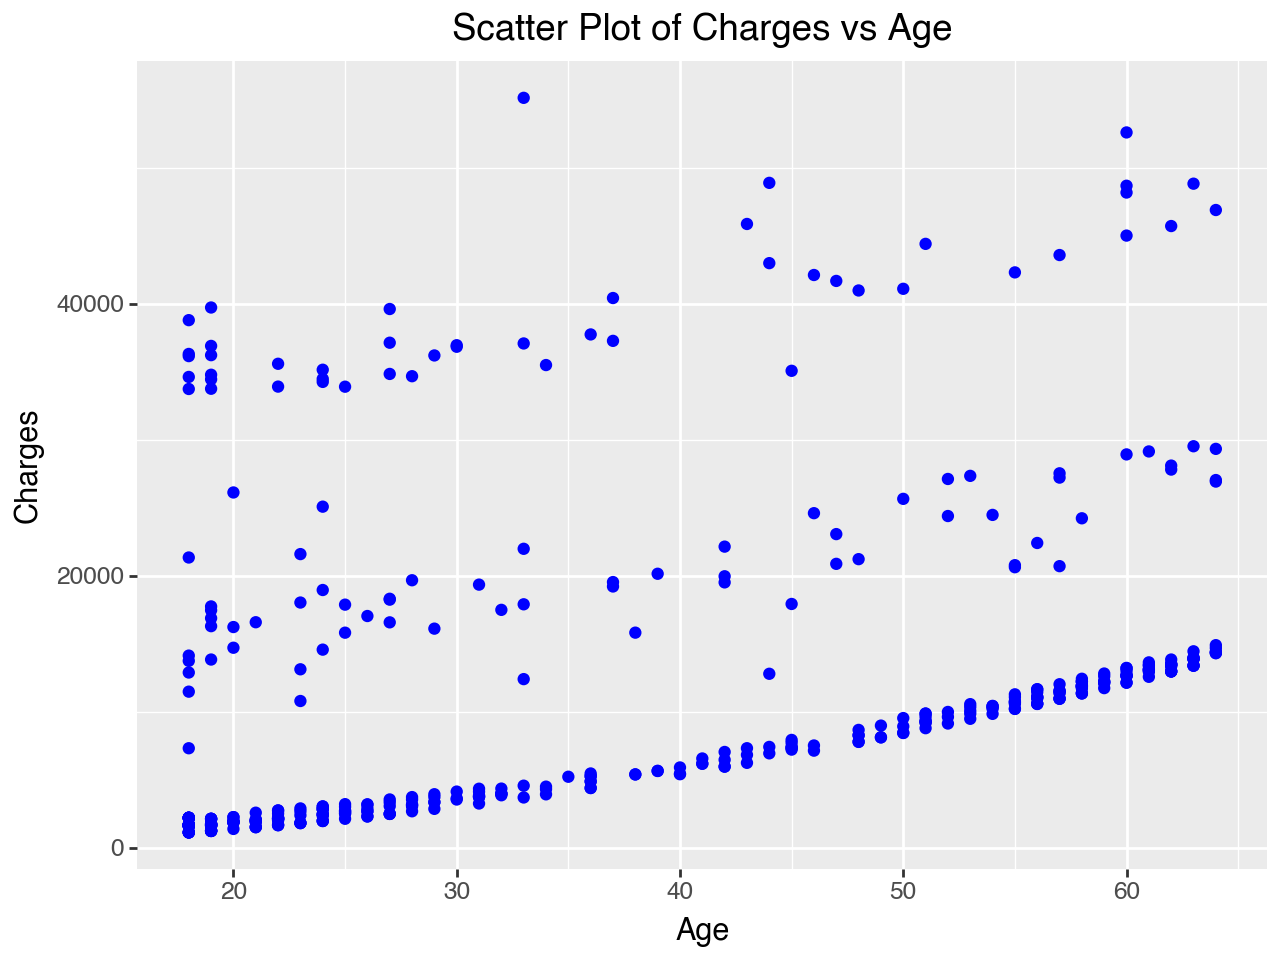

In [91]:
#Age
(ggplot(df,aes(x="age", y="charges"))
+geom_point(color='blue') +
    labs(title='Scatter Plot of Charges vs Age', x='Age', y='Charges')
)

We can see in this graph that there is a trend that an increase in age results in an increase in charge, however there are outliers at every stage. 

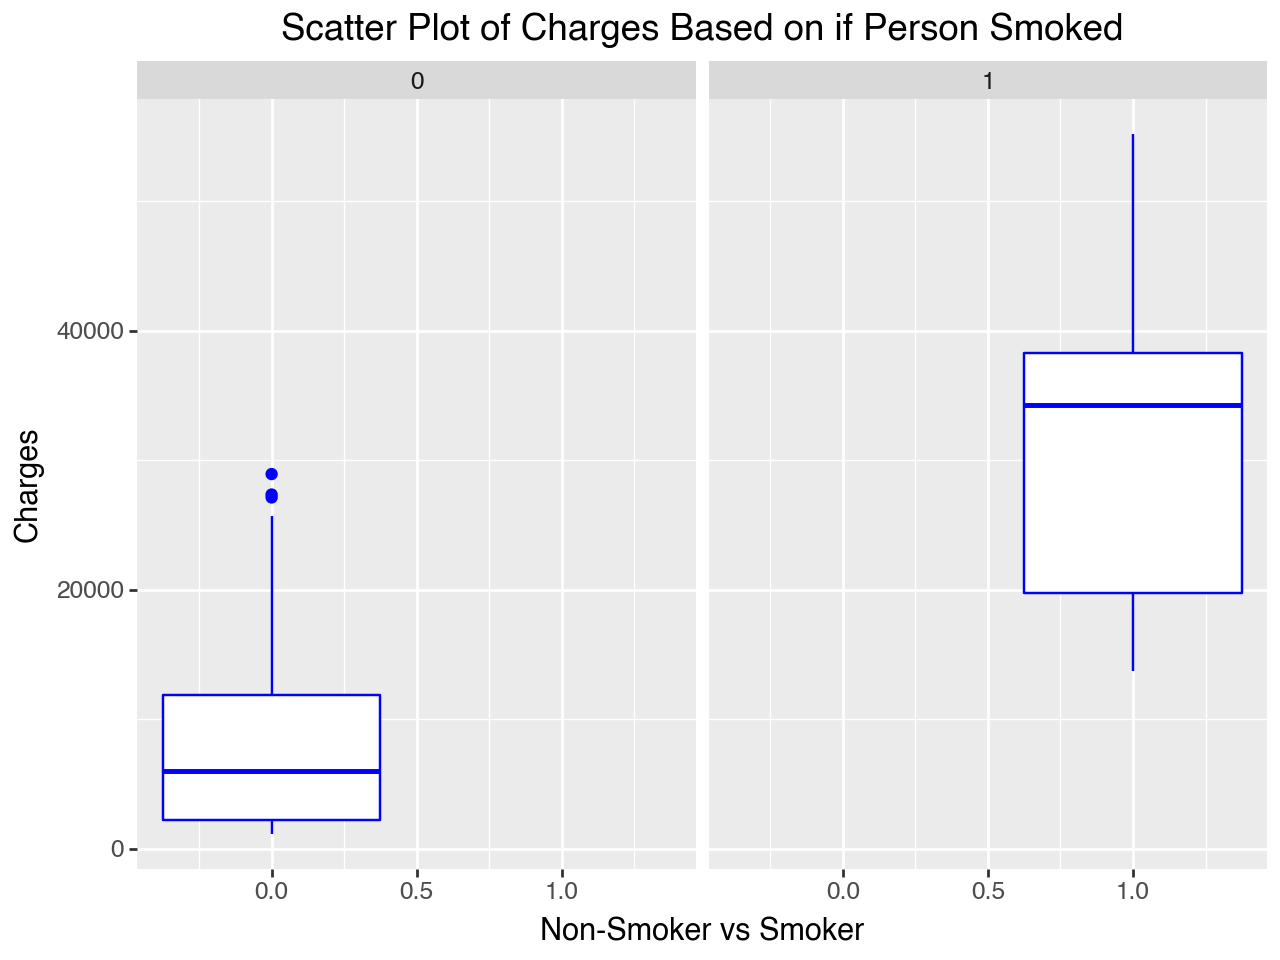

In [49]:
(ggplot(df,aes(x="smoker", y="charges"))
+geom_boxplot(color='blue') 
+labs(title='Scatter Plot of Charges Based on if Person Smoked', x='Non-Smoker vs Smoker', y='Charges')
+facet_wrap('~smoker')
)

In this box plot we can easily see that there is a higher mean and range of charges if a person smoked. 

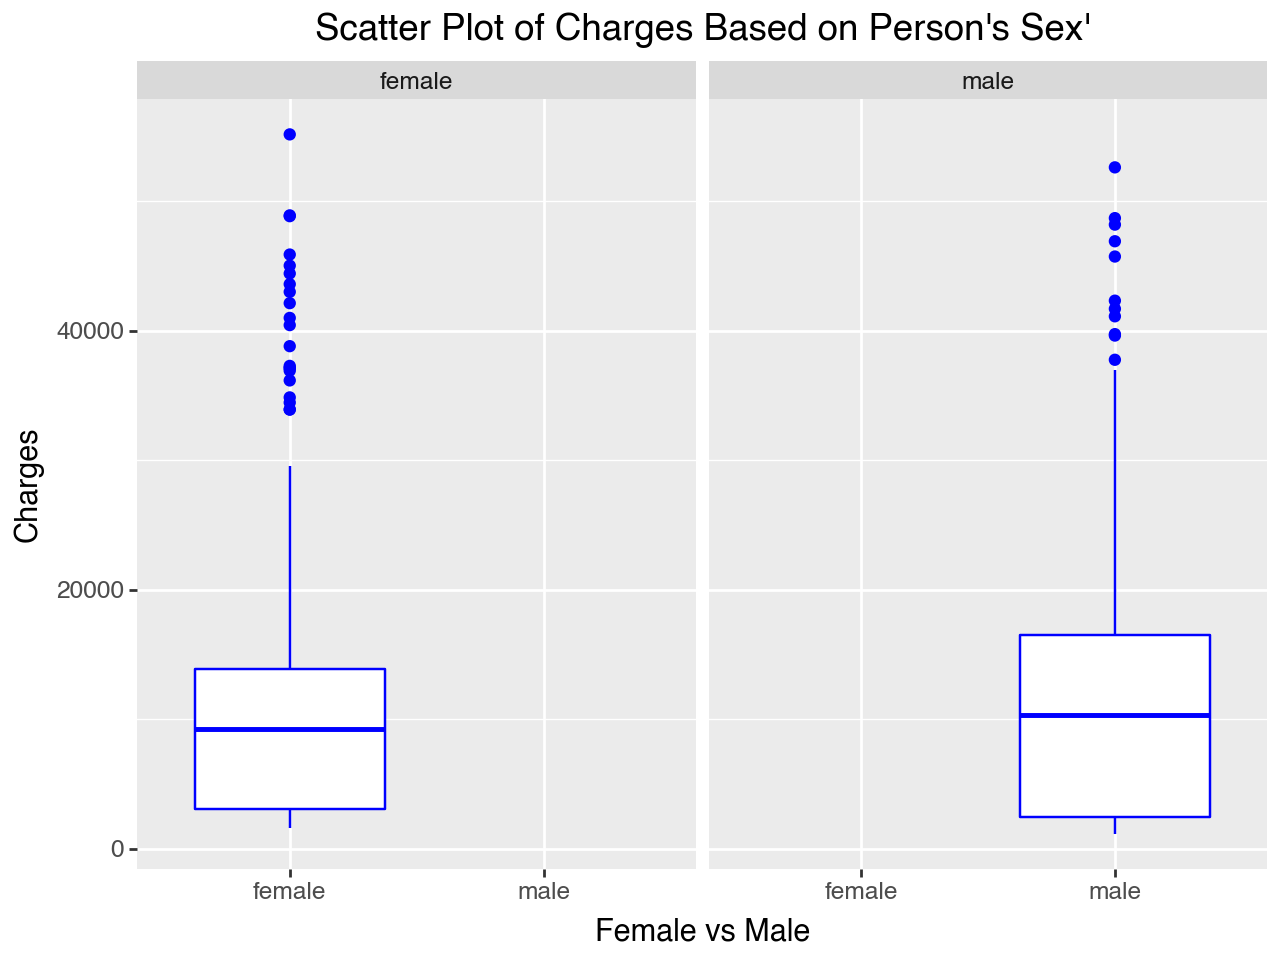

In [50]:
#Sex
(ggplot(df,aes(x="sex", y="charges"))
+geom_boxplot(color='blue') 
+labs(title="Scatter Plot of Charges Based on Person's Sex'", x='Female vs Male', y='Charges')
+facet_wrap('~sex')
)

This graph shows that while the mean charges for male and females are similar, males have a wider range of charges and a higher max. Both have a lot of outliers.

##Part Two

In [70]:
#Construct a simple linear model to predict the insurance charges from the beneficiary’s age. Discuss the model fit, and interpret the coefficient estimates.
#create training
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lr = LinearRegression()

In [93]:
#Q1
#model 1 

X= df[["age"]]
Y= df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)


#create a pipeline
pipeline1 = Pipeline ([
    ('linear regression',LinearRegression())
]).set_output(transform="pandas")

#fit the data
pipeline1.fit(X_train, y_train)

fitted_model1 = pipeline1.fit(X_train, y_train)
ytrain_preds_1 = fitted_model1.predict(X_train)
ytest_preds_1 = fitted_model1.predict(X_test)

mse_1 = mean_squared_error(y_test, ytest_preds_1)
r2_1 = r2_score(y_test, ytest_preds_1)
coef_1 = pipeline1['linear regression'].coef_
intercept_1 = pipeline1['linear regression'].intercept_

print("The MSE is",mse_1)
print("The R squared is",r2_1)
print("The slope is",coef_1)
print("The intercept is",intercept_1)

The MSE is 137417606.90817747
The R squared is 0.056776440302241826
The slope is [241.26734478]
The intercept is 3104.912213223897
The MSE is 137417606.90817747
The R squared is 0.056776440302241826
The slope is [241.26734478]
The intercept is 3104.912213223897


There is a very large MSE which means that age can not predict the charges accurately.The rsquared is also very low, which is not good. It shows that about 10% of the variance can be explained by the model. The slope is 235 meaning as age goes up by 1 year, the charges go up by about $222. At 0 years old, the charges start at about $4130. 

In [89]:
#model 2

X= df[["age", "sex"]]
Y= df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

#column 
ct2 = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex"]),
  ],
  remainder = "drop"
)

#create pipeline 2
pipeline2 = Pipeline ([
     ("standardize", ct2),
    ('linear regression',LinearRegression())
]).set_output(transform="pandas")

#fit the data
pipeline2.fit(X_train, y_train)

fitted_model2 = pipeline2.fit(X_train, y_train)
ytrain_preds_2 = fitted_model2.predict(X_train)
ytest_pred_2 = fitted_model2.predict(X_test)

mse_2 = mean_squared_error(y_test, ytest_pred_2)
r2_2 = r2_score(y_test, ytest_pred_2)


print("The MSE is",mse_2)
print("The R squared is",r2_2)


The MSE is 130620794.00546147
The R squared is -0.02230830201085121
The MSE is 130620794.00546147
The R squared is -0.02230830201085121


In [90]:
#model 3

X= df[["age","smoker" ]]
Y= df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

#column 
ct3 = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["smoker"]),
  ],
  remainder = "drop"
)

#create pipeline 3
pipeline3 = Pipeline ([
     ("standardize", ct3),
    ('linear regression',LinearRegression())
]).set_output(transform="pandas")

#fit the data

fitted_model3 = pipeline3.fit(X_train, y_train)
ytest_pred_3 = fitted_model3.predict(X_test)

mse_3 = mean_squared_error(y_test, ytest_pred_3)
r2_3 = r2_score(y_test, ytest_pred_3)


print("The MSE is",mse_3)
print("The R squared is",r2_3)


The MSE is 43504816.78573456
The R squared is 0.6766149374318247
The MSE is 43504816.78573456
The R squared is 0.6766149374318247


It appears that smoker was a better predictor than sex because model 3 had a higher r squared and lower MSE value than my model 2(with sex). 
MSE: 43,504,816<130,620,794
Rsquared: 0.6766149374318247> -0.02230830201085121

**Part Three**

In [94]:
#1
#model with age and bmi
X= df[["age", "bmi"]]
Y= df["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

#column 
ct4 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["bmi", "age"]),
  ],
  remainder = "drop"
)

#create pipeline 
pipeline4 = Pipeline ([
     ("standardize", ct4),
    ('linear regression',LinearRegression())
]).set_output(transform="pandas")

#fit the data
pipeline4.fit(X_train, y_train)

fitted_model4 = pipeline4.fit(X_train, y_train)
ytest_pred_4 = fitted_model4.predict(X_test)

mse_4 = mean_squared_error(y_test, ytest_pred_4)
r2_4 = r2_score(y_test, ytest_pred_4)


print("The MSE is",mse_4)
print("The R squared is",r2_4)



The MSE is 123368199.53522323
The R squared is 0.13828533502135465
The MSE is 123368199.53522323
The R squared is 0.13828533502135465


How does the MSE compare to the model in Part Two Q1? MSE?

The MSE is lower in this model than the one in part two. This model also has a higher rsquared (0.13828533502135465 <0.10371718364666094). This is probably due to more variables leading to better predictions. 

In [102]:
#2
#create agre ^2
df['age_squared']= df['age']**2
X = df[['age','age_squared']]
Y= df["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)


ct5 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age_squared", "age"]),
  ],
  remainder = "drop"
)

#create pipeline 
pipeline5 = Pipeline ([
     ("standardize", ct5),
    ('linear regression',LinearRegression())
]).set_output(transform="pandas")

#fit the data
pipeline5.fit(X_train, y_train)

fitted_model5 = pipeline5.fit(X_train, y_train)
ytest_pred_5 = fitted_model5.predict(X_test)

mse_5 = mean_squared_error(y_test, ytest_pred_5)
r2_5 = r2_score(y_test, ytest_pred_5)


print("The MSE is",mse_5)
print("The R squared is",r2_5)


The MSE is 149961931.6844173
The R squared is 0.08224081061386213
The MSE is 149961931.6844173
The R squared is 0.08224081061386213


**How do the MSE and R-squared compare to the model in P2 Q1?**
This 